In [1]:
%tensorflow_version 2.x

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [2]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Improvement 적용 전

In [0]:
# Improvement 적용 전

model = Sequential()

model.add(Conv2D(input_shape = (32, 32, 3), filters = 30, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
# print(model.output_shape)
model.add(Activation('relu'))
# print(model.output_shape)
model.add(MaxPooling2D(pool_size = (2,2)))
# print(model.output_shape)

model.add(Conv2D(filters = 60, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 90, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
# print(model.output_shape)
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2)) 
# print(model.output_shape)
model.add(Dense(10, activation = 'softmax'))
# print(model.output_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 30)        840       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 30)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 60)        16260     
_________________________________________________________________
activation_8 (Activation)    (None, 13, 13, 60)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 60)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 90)         

In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [17]:
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

Epoch 1/30
800/800 [==============================] - 4s 5ms/step - loss: 2.1666 - accuracy: 0.2464 - val_loss: 1.7099 - val_accuracy: 0.3474
Epoch 2/30
800/800 [==============================] - 4s 4ms/step - loss: 1.6516 - accuracy: 0.3799 - val_loss: 1.4936 - val_accuracy: 0.4476
Epoch 3/30
800/800 [==============================] - 4s 5ms/step - loss: 1.4934 - accuracy: 0.4461 - val_loss: 1.3582 - val_accuracy: 0.5139
Epoch 4/30
800/800 [==============================] - 4s 5ms/step - loss: 1.3717 - accuracy: 0.5005 - val_loss: 1.3118 - val_accuracy: 0.5283
Epoch 5/30
800/800 [==============================] - 4s 5ms/step - loss: 1.2765 - accuracy: 0.5382 - val_loss: 1.1896 - val_accuracy: 0.5731
Epoch 6/30
800/800 [==============================] - 4s 4ms/step - loss: 1.1843 - accuracy: 0.5763 - val_loss: 1.2562 - val_accuracy: 0.5498
Epoch 7/30
800/800 [==============================] - 4s 4ms/step - loss: 1.1271 - accuracy: 0.6035 - val_loss: 1.0833 - val_accuracy: 0.6244
Epoch 

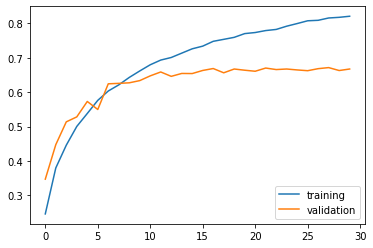

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

In [19]:
results = model.evaluate(x_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.3144 - accuracy: 0.6617
loss:  1.3144137859344482
accuracy:  0.6617000102996826


## Improvement 적용 후

In [20]:
# Improvement 적용 후

model = Sequential()

model.add(Conv2D(input_shape = (32, 32, 3), filters = 64, kernel_size = (3,3), 
                 strides = (1,1), padding = 'same', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), 
                 strides = (1,1), padding = 'same', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

'''model.add(Conv2D(filters = 1024, kernel_size = (3,3), 
                 strides = (1,1), padding = 'same', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))'''

'''model.add(Conv2D(filters = 32, kernel_size = (1,1), 
                 strides = (1,1), padding = 'same', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(MaxPooling2D(pool_size = (2,2)))'''

model.add(Flatten())

model.add(Dense(512, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 

model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Dense(64, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 

model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
print(model.output_shape)

(None, 10)


In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
activation_11 (Activation)   (None, 16, 16, 128)      

In [0]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [23]:
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
800/800 [==============================] - 13s 16ms/step - loss: 1.7783 - accuracy: 0.3627 - val_loss: 1.4447 - val_accuracy: 0.4694
Epoch 2/20
800/800 [==============================] - 12s 15ms/step - loss: 1.2487 - accuracy: 0.5566 - val_loss: 1.1351 - val_accuracy: 0.5944
Epoch 3/20
800/800 [==============================] - 12s 16ms/step - loss: 1.0460 - accuracy: 0.6378 - val_loss: 1.0057 - val_accuracy: 0.6346
Epoch 4/20
800/800 [==============================] - 12s 16ms/step - loss: 0.9100 - accuracy: 0.6907 - val_loss: 0.9987 - val_accuracy: 0.6515
Epoch 5/20
800/800 [==============================] - 12s 16ms/step - loss: 0.8063 - accuracy: 0.7311 - val_loss: 1.0890 - val_accuracy: 0.6288
Epoch 6/20
800/800 [==============================] - 12s 16ms/step - loss: 0.7250 - accuracy: 0.7609 - val_loss: 0.7836 - val_accuracy: 0.7285
Epoch 7/20
800/800 [==============================] - 12s 16ms/step - loss: 0.6582 - accuracy: 0.7818 - val_loss: 0.7483 - val_accuracy:

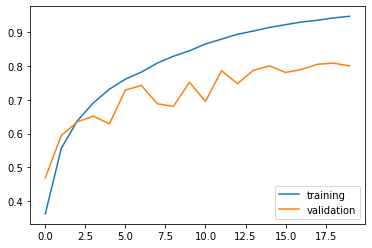

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

In [25]:
results = model.evaluate(x_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.7693 - accuracy: 0.7916
loss:  0.7692796587944031
accuracy:  0.7915999889373779


[요약]
여러 Improvement technique 적용으로 예측 정확성을 66% 에서 79% 까지 끌어올릴 수 있었다.

<사용된 기법>
- kernel_initializer
- BatchNormalization
- Dropout
- NIN